## Final Project Submission

Please fill out:
* Student name: Celine Sitina
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Faith Cherotich
* Blog post URL:https://celinesitina.blogspot.com/2025/06/phase-1data-anlysis-on-aviation-dataset.html


# AVIATION ANALYSIS
## Project Goal
project aims to predict aircraft that have lower risk for the company business of purchasing and operating aircraft
## Data source and exploration
The data is from Kaggle from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents.


## Importing necessary Libraries

importing pandas library

importing numpy for calculations

importing seaborn and matplotlib for visuals

importing warnings to ignore warnings and for clean code

In [169]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [170]:
# loading the dataset to a dataframe df
df = pd.read_csv(
    r"C:\Users\Celine\OneDrive\Desktop\Flatiron\Assignments\Phase 1\Phase 1 project\dsc-phase-1-project-v3\data\Aviation_Data.csv",
    low_memory=False
)
#prints the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [171]:
#list all columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Understanding the data

Understanding the data by checking its shape,check if there are missing values ,what is the data about,the relationship of various columns,checking for outliers.

In [100]:
#df.shape
df.shape

(90348, 31)

In [101]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Standardize column names by replacing dots( . ) with underscore( _ )
This helps improve readability ,ensure consistency and reduce syntax_errors when accessing the columns.

In [102]:
#standardizing columns by replacing (.) with (_)
df.columns = df.columns.str.replace('.', '_', regex=False)
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      90348 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50132 non-null  object 
 9   Airport_Name            52704 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87507 non-null  object 
 14  Make                    88826 non-null

In [104]:
#finding missing values
df.isnull().sum()

Event_Id                   1459
Investigation_Type            0
Accident_Number            1459
Event_Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport_Code              40216
Airport_Name              37644
Injury_Severity            2459
Aircraft_damage            4653
Aircraft_Category         58061
Registration_Number        2841
Make                       1522
Model                      1551
Amateur_Built              1561
Number_of_Engines          7543
Engine_Type                8555
FAR_Description           58325
Schedule                  77766
Purpose_of_flight          7651
Air_carrier               73700
Total_Fatal_Injuries      12860
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Uninjured            7371
Weather_Condition          5951
Broad_phase_of_flight     28624
Report_Status              7843
Publication_Date          16689
dtype: i

In [105]:
#finding the percentage of missing values
df.isnull().sum()/df.shape[0] * 100

Event_Id                   1.614867
Investigation_Type         0.000000
Accident_Number            1.614867
Event_Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport_Code              44.512330
Airport_Name              41.665560
Injury_Severity            2.721698
Aircraft_damage            5.150086
Aircraft_Category         64.263736
Registration_Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur_Built              1.727764
Number_of_Engines          8.348829
Engine_Type                9.468942
FAR_Description           64.555939
Schedule                  86.073848
Purpose_of_flight          8.468367
Air_carrier               81.573471
Total_Fatal_Injuries      14.233851
Total_Serious_Injuries    15.461327
Total_Minor_Injuries      14.822686
Total_Uninjured            8.158454
Weather_Condition          6

In [106]:
#finding duplicates
df.duplicated().sum()

1390

In [107]:
# df.describe
df.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [108]:
#descriprtive statistics
df.describe(include='object')

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Amateur_Built,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Air_carrier,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,73659
unique,87951,71,88863,14782,27758,219,25589,27154,10374,24870,...,2,12,31,3,26,13590,4,12,17006,2923
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,16317


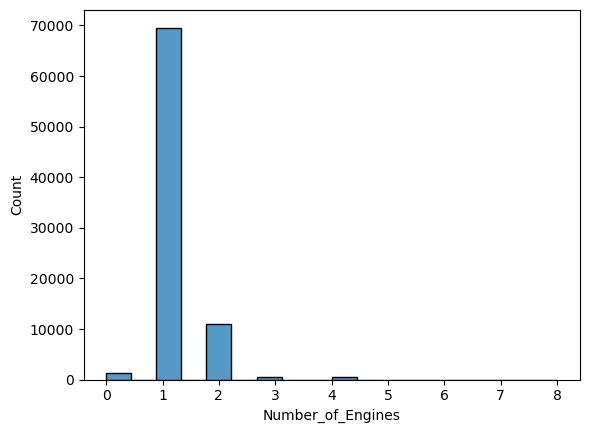

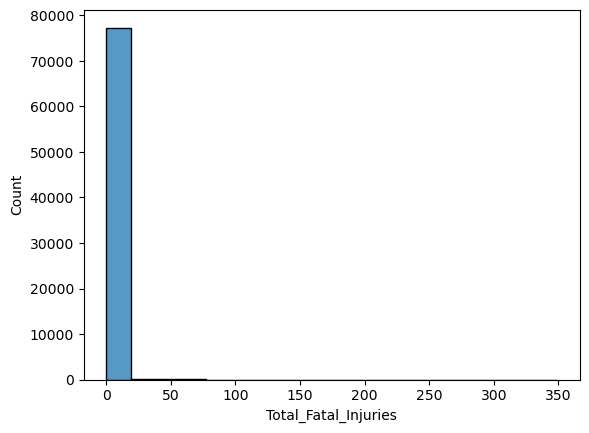

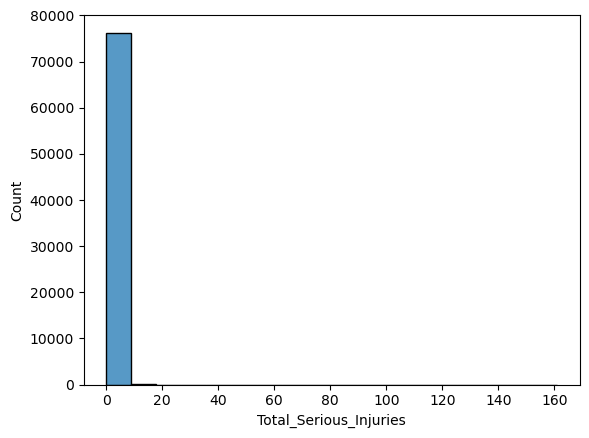

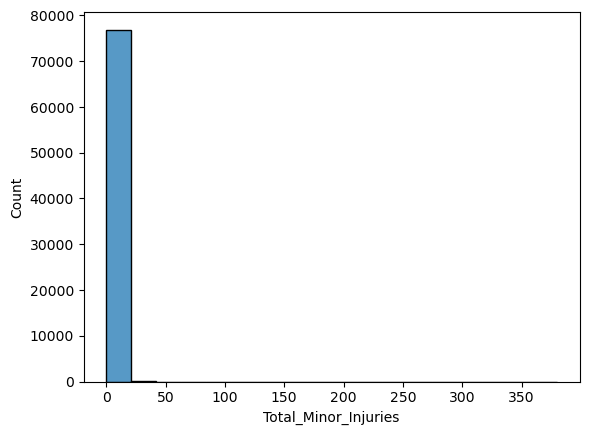

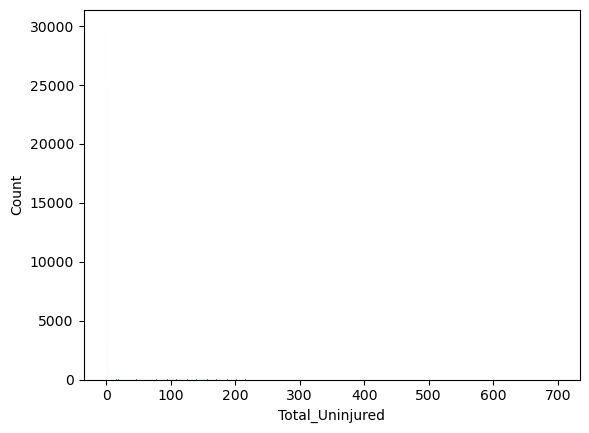

In [109]:
# histogram to understand distribution
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df, x=i)
    plt.show()

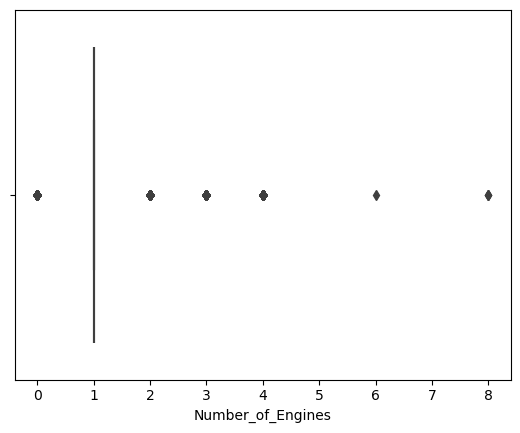

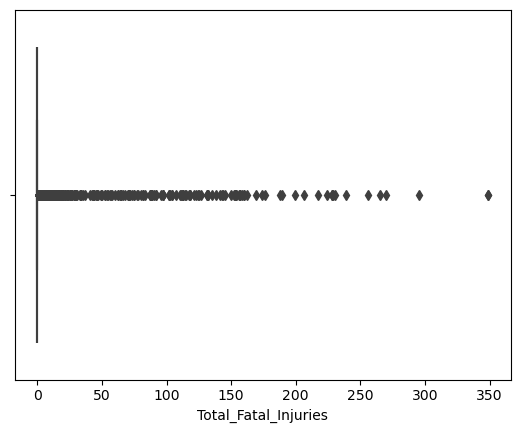

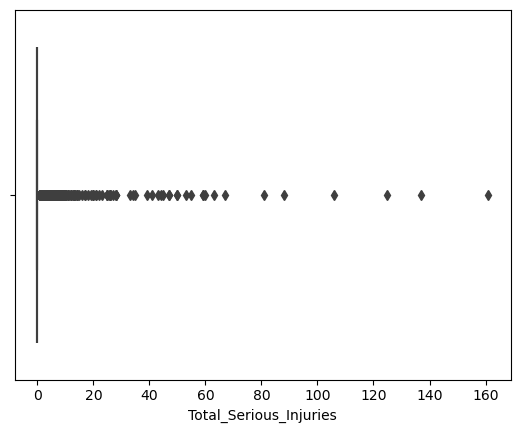

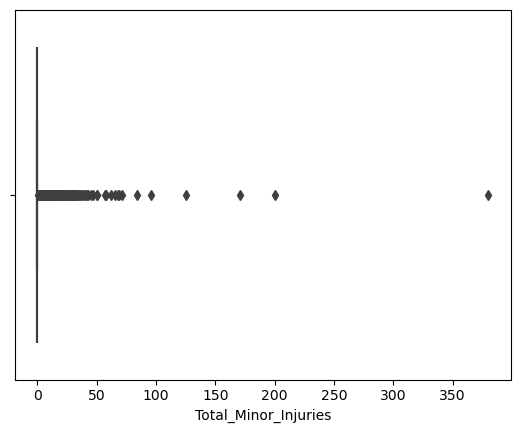

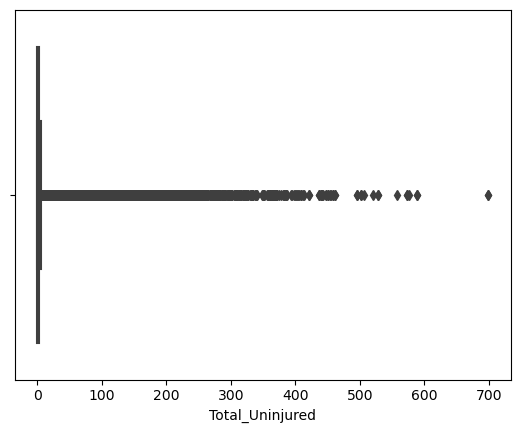

In [110]:
# boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [111]:
#Scatter plot to understand rekationship
#first identifyinng columns with numeric data.

df.select_dtypes(include='number').columns

Index(['Number_of_Engines', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured'],
      dtype='object')

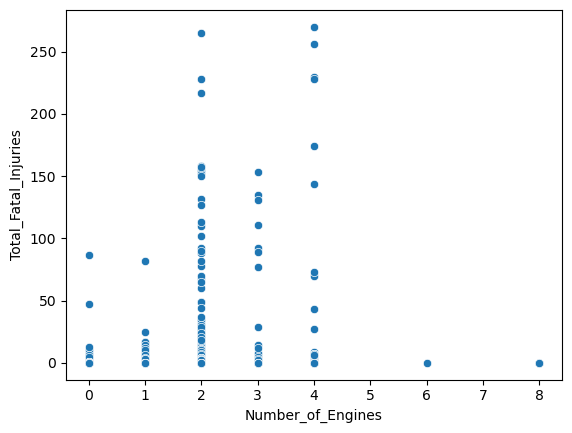

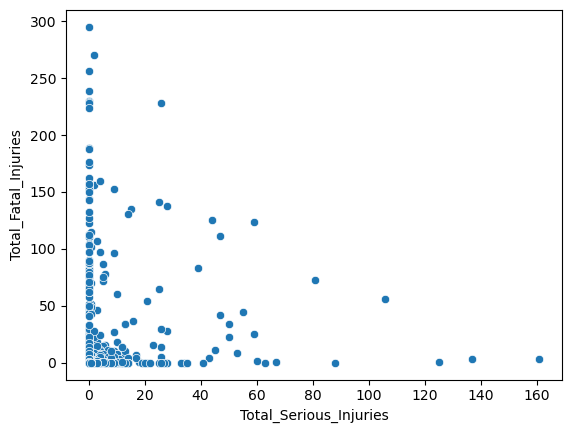

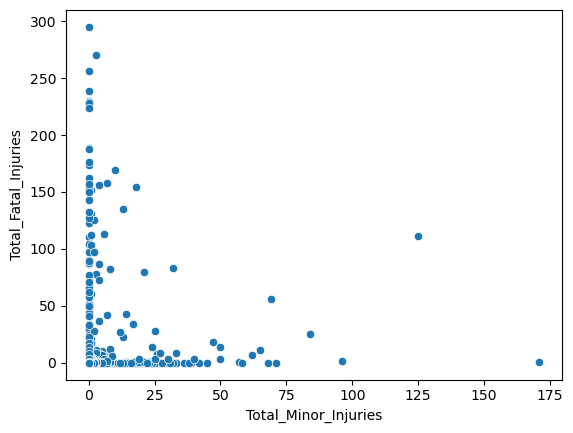

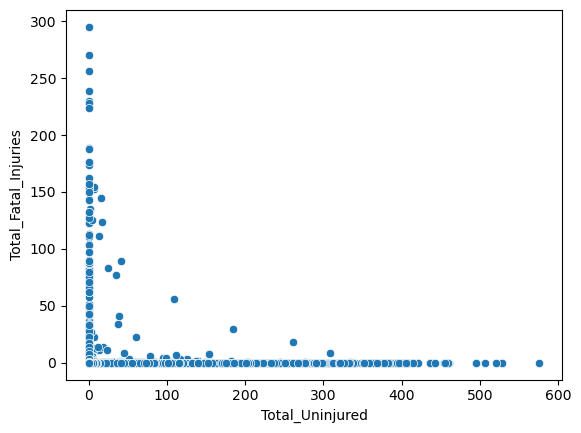

In [112]:
#plotting the scatter plot
for i in ['Number_of_Engines','Total_Serious_Injuries','Total_Minor_Injuries', 'Total_Uninjured']:
 sns.scatterplot(data=df, x=i ,y='Total_Fatal_Injuries')
 plt.show()

<Axes: >

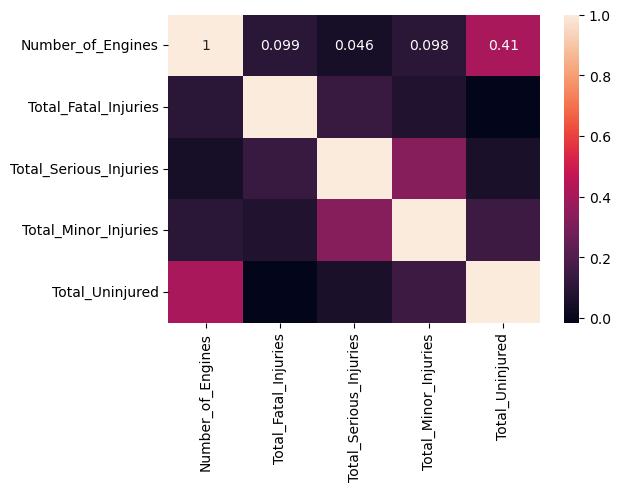

In [113]:
# correlation with heatmap to innterpret relation and multicolliniarity

#selecting numeric columns to compute correlation and assigning it to a dataframe s
s=df.select_dtypes(include='number').corr()

#plotting the correlatiion using a heatmap

plt.figure(figsize=(6,4))
sns.heatmap(s, annot=True)

## Data cleaning

Handling missing values , Handling outliers, ensuring the datatypes are correct

### 1.Handling missing values

After identifying the missing values based on their percentages and importance of the column ,some columns will be dropped ,others will be filled with either median or mode or zero or unknown.

In [114]:
#identify Missing values
df.isnull().sum()/df.shape[0] * 100

Event_Id                   1.614867
Investigation_Type         0.000000
Accident_Number            1.614867
Event_Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport_Code              44.512330
Airport_Name              41.665560
Injury_Severity            2.721698
Aircraft_damage            5.150086
Aircraft_Category         64.263736
Registration_Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur_Built              1.727764
Number_of_Engines          8.348829
Engine_Type                9.468942
FAR_Description           64.555939
Schedule                  86.073848
Purpose_of_flight          8.468367
Air_carrier               81.573471
Total_Fatal_Injuries      14.233851
Total_Serious_Injuries    15.461327
Total_Minor_Injuries      14.822686
Total_Uninjured            8.158454
Weather_Condition          6

In [115]:
#Dropping columns with higher percentages
columns_to_drop = ['Latitude', 'Longitude', 'Airport_Code', 'Airport_Name','FAR_Description',
                   'Schedule', 'Air_carrier','Publication_Date']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [116]:
#confirming the dropped columns above are dropped
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status'],
      dtype='object')

In [117]:
#Filling categorical data with unknown
df['Broad_phase_of_flight']= df['Broad_phase_of_flight'].fillna('unknown')
df['Engine_Type']= df['Engine_Type'].fillna('unknown')
df['Purpose_of_flight']= df['Purpose_of_flight'].fillna('unknown')
df['Weather_Condition']= df['Weather_Condition'].fillna('unknown')
df['Aircraft_damage']= df['Aircraft_damage'].fillna('unknown')
df['Registration_Number']= df['Registration_Number'].fillna('unknown')
df['Location']= df['Location'].fillna('unknown')
df['Aircraft_Category']= df['Aircraft_Category'].fillna('unknown')

In [118]:
#drop rows where we have unique identifiers missing
df.dropna(subset=['Event_Id','Accident_Number'], inplace=True)

In [119]:
#filling numerics with 0 
##injuries filled with zero because there is a possibility of no injury
zero_injuries = ['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured']
df[zero_injuries] = df[zero_injuries].fillna(0)

In [120]:
#Filling number of engines wiith median
df['Number_of_Engines'] = df['Number_of_Engines'].fillna(df['Number_of_Engines'].median())

In [121]:
#filling with mode

mode_filled_columns = ['Country','Model','Make','Amateur_Built', 'Report_Status']

for col in mode_filled_columns:
 df[col] = df[col].fillna(df[col].mode()[0])

In [122]:
df.isnull().sum().sort_values(ascending=False)

Injury_Severity           1000
Event_Id                     0
Amateur_Built                0
Broad_phase_of_flight        0
Weather_Condition            0
Total_Uninjured              0
Total_Minor_Injuries         0
Total_Serious_Injuries       0
Total_Fatal_Injuries         0
Purpose_of_flight            0
Engine_Type                  0
Number_of_Engines            0
Model                        0
Investigation_Type           0
Make                         0
Registration_Number          0
Aircraft_Category            0
Aircraft_damage              0
Country                      0
Location                     0
Event_Date                   0
Accident_Number              0
Report_Status                0
dtype: int64

In [123]:
df['Injury_Severity'] = df['Injury_Severity'].astype(str)

#split and then strip to renomve parenthesis and anyother whitespace
df['Injury_Severity'] = df['Injury_Severity'].str.split('(').str[0].str.strip()

df['Injury_Severity'].value_counts(dropna=False)

Injury_Severity
Non-Fatal      67357
Fatal          17826
Incident        2219
nan             1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

In [124]:
df.isnull().sum().sort_values(ascending=False)

Event_Id                  0
Amateur_Built             0
Broad_phase_of_flight     0
Weather_Condition         0
Total_Uninjured           0
Total_Minor_Injuries      0
Total_Serious_Injuries    0
Total_Fatal_Injuries      0
Purpose_of_flight         0
Engine_Type               0
Number_of_Engines         0
Model                     0
Investigation_Type        0
Make                      0
Registration_Number       0
Aircraft_Category         0
Aircraft_damage           0
Injury_Severity           0
Country                   0
Location                  0
Event_Date                0
Accident_Number           0
Report_Status             0
dtype: int64

In [125]:
#converting the nan from string  then dropping them for clear accurate analysis
df['Injury_Severity'] = df['Injury_Severity'].replace('nan',np.nan)
df=df.dropna(subset=['Injury_Severity'] )

In [126]:
df.isnull().sum().sort_values(ascending=False)

Event_Id                  0
Amateur_Built             0
Broad_phase_of_flight     0
Weather_Condition         0
Total_Uninjured           0
Total_Minor_Injuries      0
Total_Serious_Injuries    0
Total_Fatal_Injuries      0
Purpose_of_flight         0
Engine_Type               0
Number_of_Engines         0
Model                     0
Investigation_Type        0
Make                      0
Registration_Number       0
Aircraft_Category         0
Aircraft_damage           0
Injury_Severity           0
Country                   0
Location                  0
Event_Date                0
Accident_Number           0
Report_Status             0
dtype: int64

In [127]:
#checking for missing values in injury severity
df['Injury_Severity'].isna().sum()

0

### 2.Handling outliers

Earlier we detected presence of outliers ,the columns with numerical data are selected 
Using the percentile method to deal with outliers it provides a reasonable values to work with compared to IQR method

In [128]:
#columns with numeric data only
df.select_dtypes(include='number').dtypes

Number_of_Engines         float64
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
dtype: object

#### using the percentile method

In [129]:
#using the upper and lower limit 
upper_limit = df['Total_Serious_Injuries'].quantile(0.99)
lower_limit = df['Total_Serious_Injuries'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 3.0
lower limit: 0.0


<Axes: >

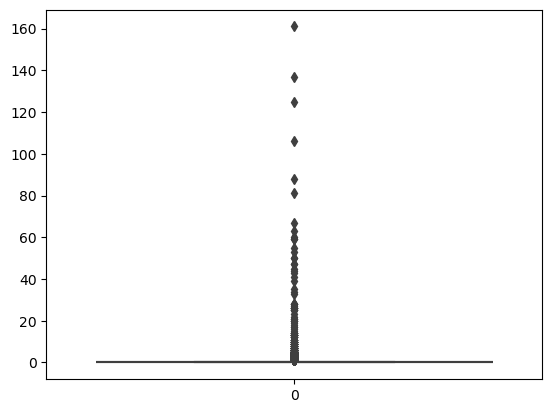

In [130]:
#boxplot visual to show the distribution with outliers
sns.boxplot(df['Total_Serious_Injuries'])

In [131]:
#find outliers
df.loc[(df['Total_Serious_Injuries'] > upper_limit) | (df['Total_Serious_Injuries'] < lower_limit)]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,Fatal,Destroyed,unknown,N62AF,...,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause
155,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",United States,Fatal,Destroyed,Airplane,N113WA,...,3.0,Turbo Fan,Unknown,2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause
214,20020917X02480,Accident,NYC82AA028,1982-02-01,"GROTON, CT",United States,Non-Fatal,Destroyed,Airplane,N451C,...,2.0,Turbo Prop,Unknown,0.0,5.0,2.0,0.0,IMC,Approach,Probable Cause
256,20020917X02284,Accident,LAX82FJA04,1982-02-07,"KALAUPAPA, HI",United States,Non-Fatal,Destroyed,Airplane,N16524,...,1.0,Reciprocating,Personal,0.0,4.0,0.0,0.0,VMC,Landing,Probable Cause
295,20020917X01896,Accident,CHI82FEG02,1982-02-12,"PLEASANT HILL, OH",United States,Non-Fatal,Destroyed,Airplane,N5266P,...,1.0,Reciprocating,Personal,0.0,4.0,0.0,0.0,VMC,Cruise,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89122,20220506105048,Accident,CEN22LA190,2022-05-06,"Houston, TX",United States,Minor,Substantial,Airplane,XB-FQS,...,2.0,unknown,Personal,0.0,4.0,0.0,0.0,VMC,unknown,Probable Cause
89237,20220830105828,Accident,DCA22WA190,2022-05-27,"Lahore,",Pakistan,Serious,unknown,Airplane,A6-BLF,...,1.0,unknown,unknown,0.0,6.0,1.0,121.0,unknown,unknown,Probable Cause
89404,20220622105298,Accident,DCA22FA132,2022-06-21,"Miami, FL",United States,Minor,Substantial,Airplane,HI-1064,...,1.0,unknown,unknown,0.0,4.0,0.0,136.0,unknown,unknown,Probable Cause
89672,20220802105639,Accident,ANC22LA063,2022-07-26,"Anchorage, AK",United States,Serious,Substantial,Airplane,N9776R,...,1.0,Reciprocating,Aerial Observation,0.0,4.0,2.0,1.0,VMC,unknown,The pilots failure to maintain directional co...


In [132]:
#capping-changing the outlier values to lower or upper limit 
#preserving values since serious injuries is a critical information and every value counts
outlier_remove_df = df.copy()
outlier_remove_df.loc[(outlier_remove_df['Total_Serious_Injuries']> upper_limit), 'Total_Serious_Injuries']=upper_limit
outlier_remove_df.loc[(outlier_remove_df['Total_Serious_Injuries']< lower_limit), 'Total_Serious_Injuries']=lower_limit

<Axes: >

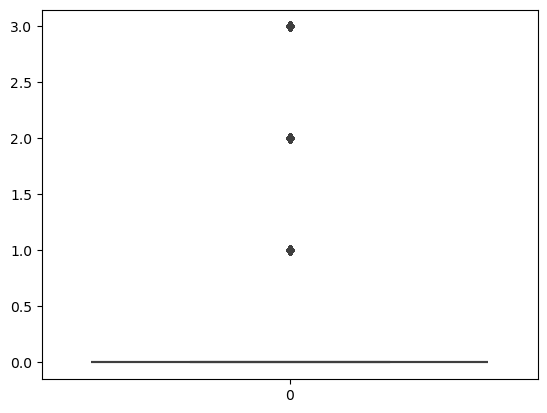

In [133]:
#boxplot after handling outliers
sns.boxplot(outlier_remove_df['Total_Serious_Injuries'])

In [134]:
#capping-changing the outlier values to lower or upper limit
outlier_remove_df = df.copy()
outlier_remove_df.loc[(outlier_remove_df['Total_Serious_Injuries']> upper_limit), 'Total_Serious_Injuries']=upper_limit
outlier_remove_df.loc[(outlier_remove_df['Total_Serious_Injuries']< lower_limit), 'Total_Serious_Injuries']=lower_limit

<Axes: >

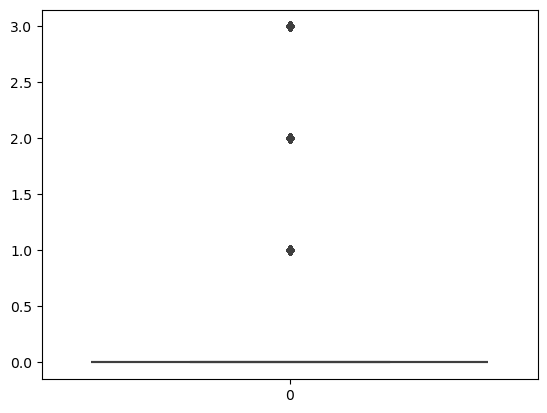

In [135]:
sns.boxplot(outlier_remove_df['Total_Serious_Injuries'])

<Axes: >

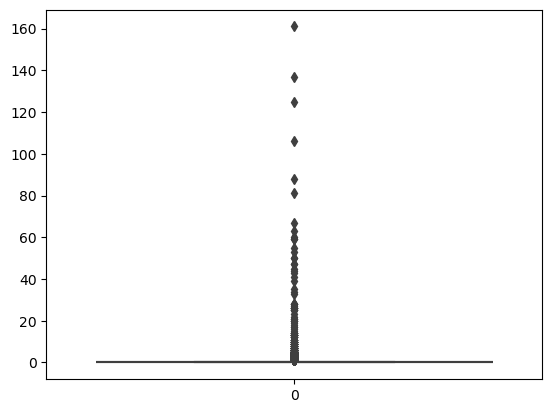

In [136]:
#graph before removing outliers
sns.boxplot(df['Total_Serious_Injuries'])

<Axes: >

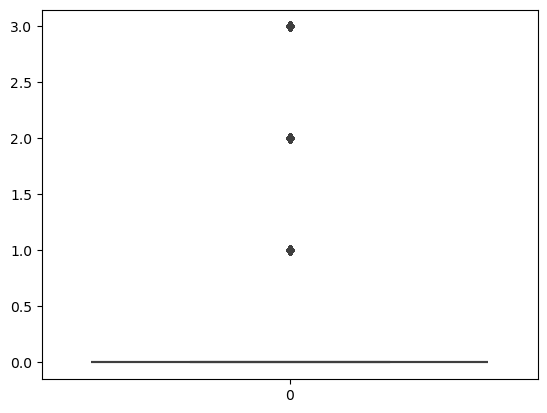

In [137]:
#graph after removing outliers
sns.boxplot(outlier_remove_df['Total_Serious_Injuries'])

In [138]:
#handling outliers for Number.of.Engines
upper_limit = df['Number_of_Engines'].quantile(0.99)
lower_limit = df['Number_of_Engines'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)


upper limit: 3.0
lower limit: 0.0


In [139]:
#find outliers
df.loc[(df['Number_of_Engines'] > upper_limit) | (df['Number_of_Engines'] < lower_limit)]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
129,20020917X02397,Accident,MIA82FA034,1982-01-19,"MIAMI, FL",United States,Non-Fatal,Substantial,Airplane,HCBHS,...,4.0,Turbo Prop,Unknown,0.0,0.0,0.0,6.0,VMC,Landing,Probable Cause
506,20020917X02477,Incident,MKC82IA042,1982-03-08,"LAS VEGAS, NV",United States,Incident,unknown,Airplane,N6728,...,4.0,Turbo Fan,Unknown,1.0,0.0,0.0,0.0,VMC,Standing,Probable Cause
558,20020917X02154,Accident,LAX82AA106A,1982-03-13,"GLENDALE, AZ",United States,Fatal,Destroyed,Airplane,KC135,...,4.0,Turbo Jet,Unknown,6.0,0.0,0.0,0.0,UNK,Approach,Probable Cause
669,20020917X02279,Accident,LAX82FA119,1982-03-24,"MARANA, AZ",United States,Non-Fatal,Substantial,Airplane,N752TA,...,4.0,Turbo Jet,Ferry,0.0,0.0,0.0,7.0,VMC,Landing,Probable Cause
1121,20020917X02909,Accident,CHI82DA156,1982-05-08,"YALE, MI",United States,Non-Fatal,Substantial,Airplane,N15585,...,4.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87906,20210803103617,Incident,DCA21WA191,2021-07-30,"Santa Cruz de la Sierra, Saint Barthelemy",Saint Barthelemy,Non-Fatal,unknown,Airplane,CP-2889,...,4.0,unknown,unknown,0.0,0.0,0.0,97.0,unknown,unknown,Probable Cause
88484,20211206104355,Accident,DCA22LA038,2021-11-29,"Miami, FL",United States,Non-Fatal,Substantial,Airplane,N705CK,...,4.0,unknown,unknown,0.0,0.0,0.0,3.0,unknown,unknown,Probable Cause
88714,20220217104654,Accident,DCA22FA082,2022-02-16,"Jolon, CA",United States,Non-Fatal,Substantial,Airplane,N542AJ,...,6.0,unknown,Flight Test,0.0,0.0,0.0,0.0,unknown,unknown,Probable Cause
89165,20220520105109,Accident,WPR22LA183,2022-05-14,"Winters, CA",United States,Non-Fatal,Substantial,Airplane,N605PK,...,4.0,Electric,Personal,0.0,0.0,0.0,0.0,VMC,unknown,Delamination of the uncrewed aircraft systems...


In [140]:
#trimming the outlier
outlier_remove_df = df.loc[(df['Number_of_Engines'] <= upper_limit) & (df['Number_of_Engines'] >= lower_limit)]
print('before removing outliers: ', len(df))
print('after removing outliers: ', len(outlier_remove_df))
print('outliers:', len(df) - len(outlier_remove_df))

before removing outliers:  87889
after removing outliers:  87473
outliers: 416


<Axes: >

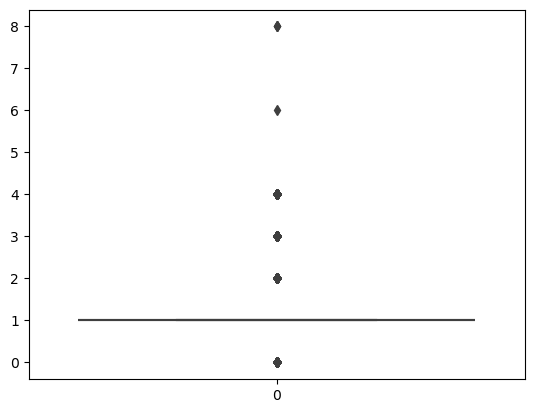

In [141]:
#graph before removing outliers
sns.boxplot(df['Number_of_Engines'])

<Axes: >

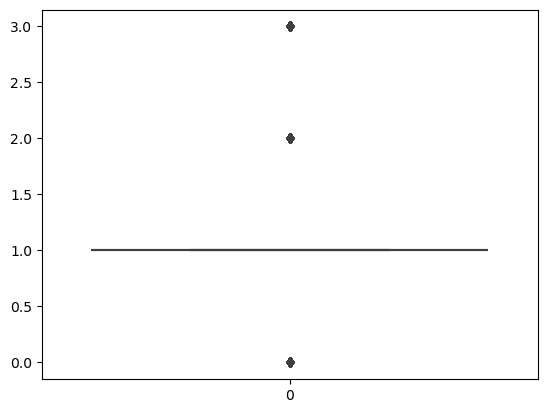

In [142]:
#graph after removing outliers
sns.boxplot(outlier_remove_df['Number_of_Engines'])

In [143]:
upper_limit = df['Total_Uninjured'].quantile(0.99)
lower_limit = df['Total_Uninjured'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 147.0
lower limit: 0.0


In [144]:
#find outliers
df.loc[(df['Total_Uninjured'] > upper_limit) | (df['Total_Uninjured'] < lower_limit)]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,Incident,unknown,Airplane,N31031,...,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause
155,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",United States,Fatal,Destroyed,Airplane,N113WA,...,3.0,Turbo Fan,Unknown,2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,Non-Fatal,Minor,Airplane,N1814U,...,3.0,Turbo Fan,Unknown,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause
908,20020917X02421,Incident,MIA82IA102,1982-04-20,"MIAMI, FL",United States,Incident,Minor,Airplane,N333EA,...,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,152.0,VMC,Landing,Probable Cause
2456,20020917X03729,Incident,LAX82IA309,1982-08-21,"HONOLULU, HI",United States,Incident,Minor,Airplane,N104WA,...,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,393.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90185,20221028106216,Incident,DCA23WA037,2022-10-27,"Buenos Aires,",Argentina,Non-Fatal,unknown,unknown,N765AN,...,1.0,unknown,unknown,0.0,0.0,0.0,268.0,unknown,unknown,Probable Cause
90201,20221104106249,Incident,DCA23WA044,2022-11-02,"LIberia,",Costa Rica,Non-Fatal,unknown,unknown,N6714Q,...,1.0,unknown,unknown,0.0,0.0,0.0,201.0,unknown,unknown,Probable Cause
90259,20221121106329,Accident,DCA23LA067,2022-11-19,"Omaha, NE",United States,Non-Fatal,unknown,unknown,N330NW,...,1.0,unknown,unknown,0.0,0.0,0.0,153.0,unknown,unknown,Probable Cause
90285,20221222106484,Incident,DCA23WA099,2022-11-26,"Bangkok,",Thailand,Non-Fatal,unknown,unknown,HS-DBO,...,1.0,unknown,unknown,0.0,0.0,0.0,186.0,unknown,unknown,Probable Cause


In [145]:
#trimming the outlier
outlier_remove_df = df.loc[(df['Total_Uninjured'] <= upper_limit) & (df['Total_Uninjured'] >= lower_limit)]
print('before removing outliers: ', len(df))
print('after removing outliers: ', len(outlier_remove_df))
print('outliers:', len(df) - len(outlier_remove_df))


before removing outliers:  87889
after removing outliers:  87017
outliers: 872


<Axes: >

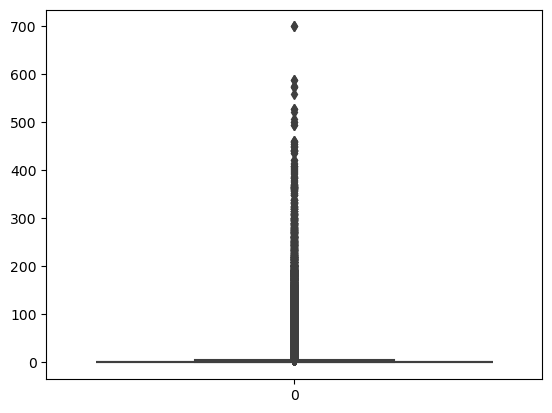

In [146]:
#graph before removing outliers
sns.boxplot(df['Total_Uninjured'])

<Axes: >

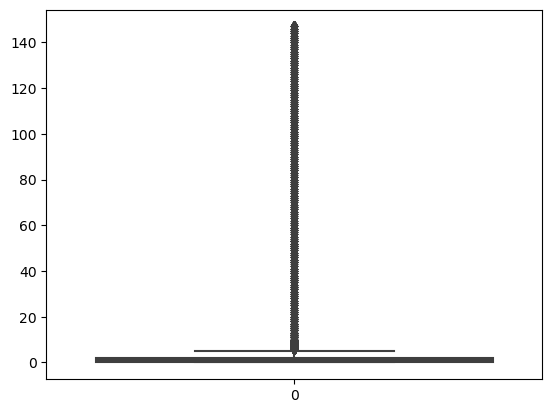

In [147]:
#graph after removing outliers
sns.boxplot(outlier_remove_df['Total_Uninjured'])

In [148]:
#Handlinng outliers in Total.Minor.Injuries
upper_limit = df['Total_Minor_Injuries'].quantile(0.99)
lower_limit = df['Total_Minor_Injuries'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 3.0
lower limit: 0.0


In [149]:
#find outliers
df.loc[(df['Total_Minor_Injuries'] > upper_limit) | (df['Total_Minor_Injuries'] < lower_limit)]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
72,20020917X02305,Accident,LAX82FUQ07,1982-01-10,"MOJAVE, CA",United States,Non-Fatal,Substantial,Airplane,N2644Q,...,1.0,Reciprocating,Personal,0.0,0.0,4.0,0.0,VMC,Landing,Probable Cause
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,Fatal,Destroyed,Airplane,N7860V,...,1.0,Reciprocating,Personal,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause
155,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",United States,Fatal,Destroyed,Airplane,N113WA,...,3.0,Turbo Fan,Unknown,2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause
160,20020917X02259,Accident,LAX82FA049B,1982-01-23,"VICTORVILLE, CA",United States,Fatal,Substantial,Airplane,N32380,...,1.0,Reciprocating,Personal,2.0,0.0,4.0,0.0,VMC,Cruise,Probable Cause
229,20020917X01923,Accident,DEN82DA029,1982-02-03,"HAYDEN, CO",United States,Non-Fatal,Destroyed,Airplane,N149JA,...,2.0,Turbo Prop,Business,0.0,0.0,6.0,0.0,IMC,Landing,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88863,20220320104802,Accident,WPR22LA125,2022-03-20,"Azusa, CA",United States,Serious,Substantial,Helicopter,N950SG,...,2.0,Turbo Shaft,Other Work Use,0.0,2.0,4.0,0.0,VMC,unknown,The pilot's failure to maintain clearance from...
89142,20220519105100,Accident,GAA22WA183,2022-05-11,"BOITUVA, OF",Brazil,Fatal,Substantial,Airplane,PT-OQR,...,1.0,unknown,unknown,2.0,0.0,7.0,7.0,unknown,unknown,Probable Cause
89184,20220519105103,Accident,WPR22LA182,2022-05-19,"Christmas Valley, OR",United States,Serious,Substantial,Helicopter,N851AL,...,1.0,Turbo Shaft,Business,0.0,0.0,4.0,0.0,VMC,unknown,The pilots inability to maintain control in h...
89216,20220525105132,Accident,ANC22LA035,2022-05-24,"Yakutat, AK",United States,Serious,Substantial,Airplane,N703TH,...,1.0,unknown,unknown,0.0,0.0,4.0,0.0,VMC,unknown,Probable Cause


In [150]:
#capping-changing the outlier values to lower or upper limit
outlier_remove_df = df.copy()
outlier_remove_df.loc[(outlier_remove_df['Total_Minor_Injuries']> upper_limit), 'Total_Minor_Injuries']=upper_limit
outlier_remove_df.loc[(outlier_remove_df['Total_Minor_Injuries']< lower_limit), 'Total_Minor_Injuries']=lower_limit

<Axes: >

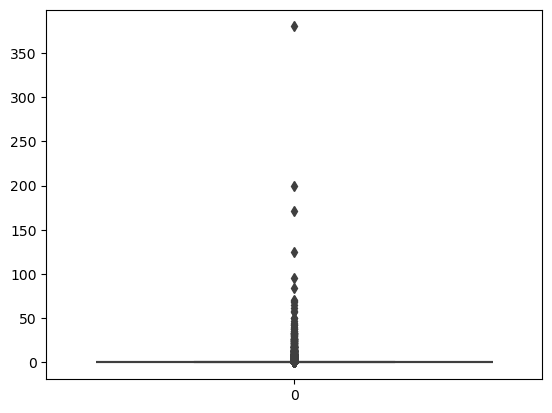

In [151]:
#graph before removing outliers
sns.boxplot(df['Total_Minor_Injuries'])

<Axes: >

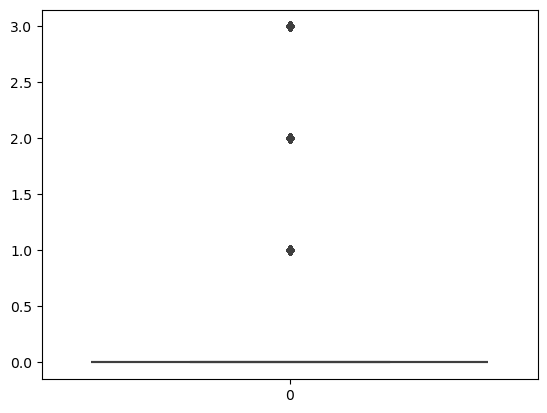

In [152]:
#graph after removing outliers
sns.boxplot(outlier_remove_df['Total_Minor_Injuries'])

In [153]:
#Handling outliers in fatal.injury
upper_limit = df['Total_Fatal_Injuries'].quantile(0.99)
lower_limit = df['Total_Fatal_Injuries'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 5.0
lower limit: 0.0


In [154]:
#find outliers
df.loc[(df['Total_Fatal_Injuries'] > upper_limit) | (df['Total_Fatal_Injuries'] < lower_limit)]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
25,20020917X01905,Accident,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,Fatal,Destroyed,Airplane,N2620L,...,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,Fatal,Destroyed,unknown,N62AF,...,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause
165,20020917X01990,Accident,FTW82AA046,1982-01-24,"LAREDO, TX",United States,Fatal,Destroyed,Airplane,N4244Z,...,2.0,Reciprocating,Personal,7.0,0.0,0.0,0.0,VMC,Approach,Probable Cause
254,20020917X02402,Accident,MIA82FA044B,1982-02-07,"W. OF HOMESTEAD, FL",United States,Fatal,Destroyed,Airplane,N7361P,...,1.0,Reciprocating,Personal,8.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause
255,20020917X02402,Accident,MIA82FA044A,1982-02-07,"W. OF HOMESTEAD, FL",United States,Fatal,Destroyed,Airplane,N2280G,...,1.0,Reciprocating,Personal,8.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89917,20220905105855,Accident,DCA22MA193,2022-09-04,"Freeland, WA",United States,Fatal,Substantial,Airplane,N725TH,...,1.0,unknown,unknown,10.0,0.0,0.0,0.0,VMC,unknown,Probable Cause
90148,20221019106164,Accident,GAA23WA009,2022-10-18,"Rudraprayag,",India,Fatal,Destroyed,Helicopter,VT-RPN,...,1.0,unknown,unknown,7.0,0.0,0.0,0.0,unknown,unknown,Probable Cause
90235,20221112106276,Accident,CEN23MA034,2022-11-12,"Dallas, TX",United States,Fatal,Destroyed,Airplane,N6763,...,1.0,unknown,ASHO,6.0,0.0,0.0,0.0,VMC,unknown,Probable Cause
90236,20221112106276,Accident,CEN23MA034,2022-11-12,"Dallas, TX",United States,Fatal,Destroyed,Airplane,N7227C,...,4.0,unknown,ASHO,6.0,0.0,0.0,0.0,VMC,unknown,Probable Cause


In [155]:
#capping-changing the outlier values to lower or upper limit
outlier_remove_df = df.copy()
outlier_remove_df.loc[(outlier_remove_df['Total_Fatal_Injuries']> upper_limit), 'Total_Fatal_Injuries']=upper_limit
outlier_remove_df.loc[(outlier_remove_df['Total_Fatal_Injuries']< lower_limit), 'Total_Fatal_Injuries']=lower_limit

<Axes: >

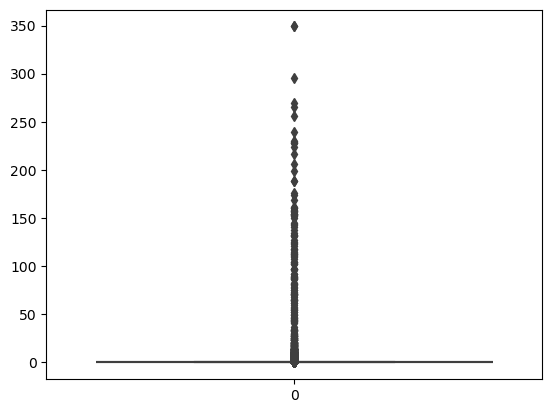

In [156]:
#graph before removing outliers
sns.boxplot(df['Total_Fatal_Injuries'])

<Axes: >

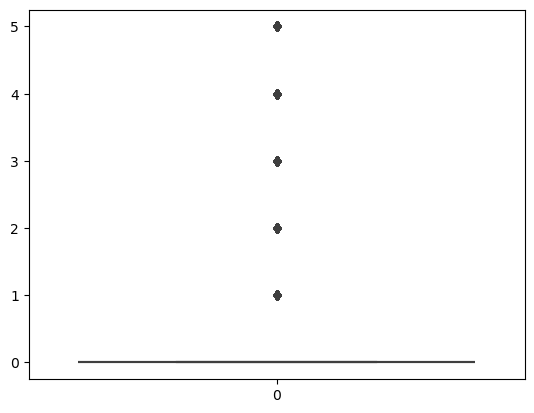

In [157]:
#graph after removing outliers
sns.boxplot(outlier_remove_df['Total_Fatal_Injuries'])

### 3.Data type cleaning
changing the data type for date from object to date
then restricting it

In [158]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status'],
      dtype='object')

In [159]:
#changing the dtype of Event_Date from object to date
df['Event_Date'] = pd.to_datetime(df['Event_Date'], dayfirst=True, errors='coerce')

In [160]:
#checking for duplicates
df.duplicated().sum()

0

### creating separate columns for year and month
creating the separate columns for year and month for easy analysis and plotting of trends
This can be handy in analysis of weather over the months and also analysis of make from year to year

In [161]:
df['year'] = df['Event_Date'].dt.year
df['month'] = df['Event_Date'].dt.month

In [162]:
#checking if year and month have been added to the column list
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'year', 'month'],
      dtype='object')

# Visualization
Using matplotlib and seaborn to make prediction

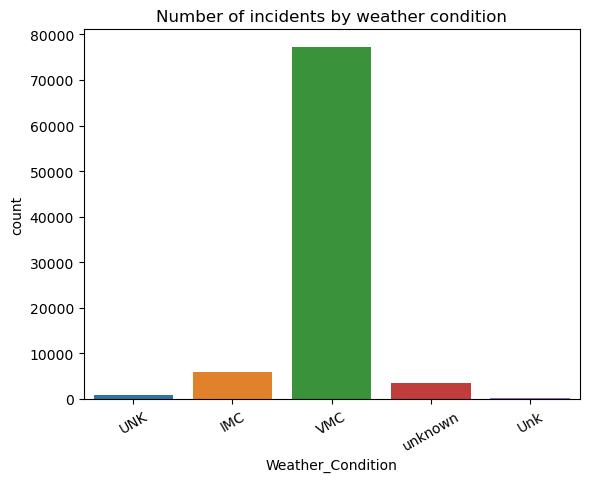

In [163]:
#Number of incidents according to the weather conditions
sns.countplot(x='Weather_Condition', data=df)
plt.title('Number of incidents by weather condition')
plt.xticks(rotation=30)
plt.show()

In [164]:
df['Weather_Condition'].value_counts(dropna=False)

Weather_Condition
VMC        77248
IMC         5968
unknown     3580
UNK          856
Unk          237
Name: count, dtype: int64

#### Aircraft damage based on the Broad phase of flight
Analysing how aircrafts are damaged at different phases of flight

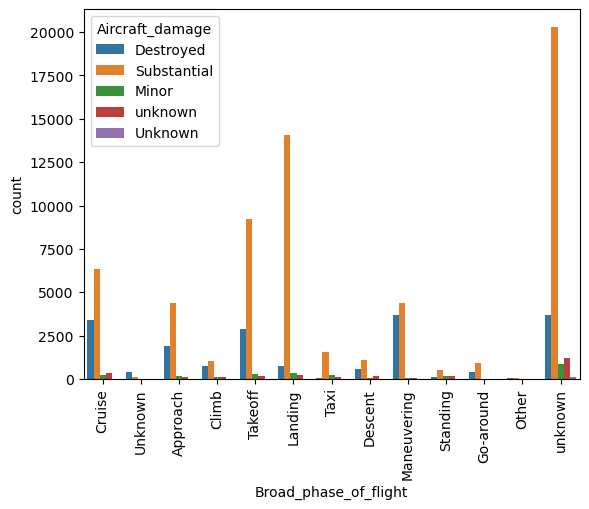

In [165]:
sns.countplot(data=df,x='Broad_phase_of_flight',hue='Aircraft_damage')
plt.xticks(rotation=90)
plt.show()

Based on the broad phase plot , Unknown,Landing and takeoff record a higher number of damage

#### Fatality by Number of engine 
How does the number of engine affect fatality rate?

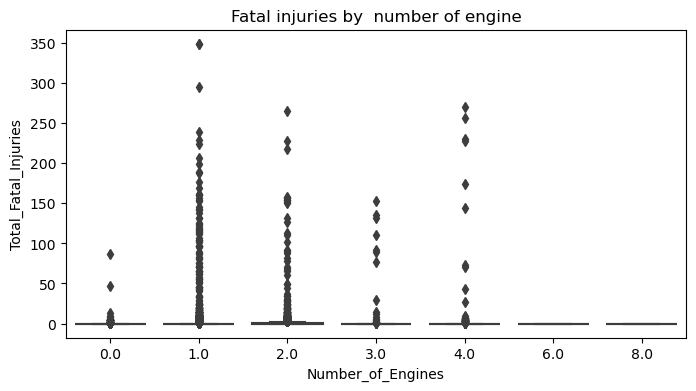

In [166]:
#boxplot showing Fatal injuries by Number of engines
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x ='Number_of_Engines', y='Total_Fatal_Injuries')
plt.title('Fatal injuries by  number of engine')
plt.xlabel('Number_of_Engines')
plt.ylabel('Total_Fatal_Injuries')
plt.show()

1 and 2 Number of engines have a higher count

#### Number of Incidents by engine type
Which engine type has more incident?

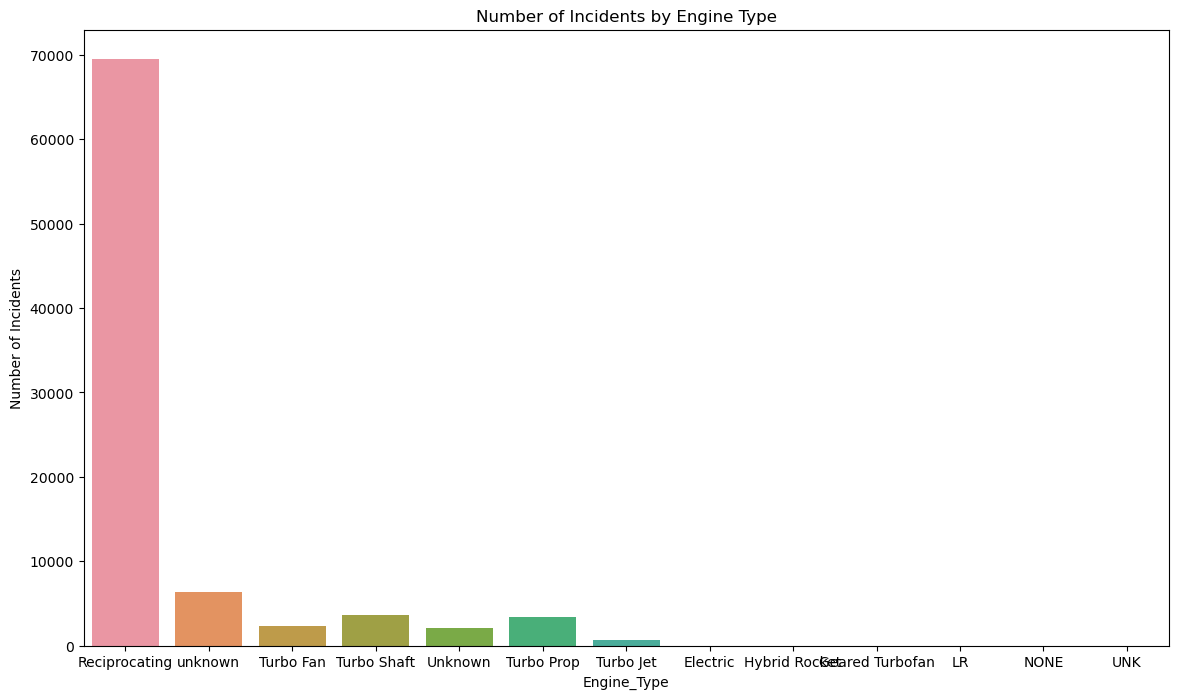

In [167]:
#Number of Incidents by engine type
#Engines with higher incidents raise security concerns
plt.figure(figsize=(14,8))
sns.countplot(data=df, x='Engine_Type')
plt.title('Number of Incidents by Engine Type')
plt.xlabel('Engine_Type')
plt.ylabel('Number of Incidents')
plt.show()

The reciprocating engine records a higher number of incidents 

#### Exporting the cleaned csv file for visualizations in Tableu

In [168]:
df.to_csv('Analysed_Aviation_Data.csv', index=False)